In [239]:
import pandas as pd
import missingno as no
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan


In [193]:
# Create a pandas DataFrame with 10 rows and 8 columns
# The first column is Home, which is a random integer between 1 and 100
# The second column is Price, which is a random integer between 100,000 and 500,000
# The third column is SqFt, which is a random integer between 500 and 3000
# The fourth column is Bedrooms, which is a random integer between 1 and 5
# The fifth column is Bathrooms, which is a random integer between 1 and 4
# The sixth column is Offers, which is a random integer between 0 and 5
# The seventh column is Brick, which is a random choice of Yes or No
# The eighth column is Neighborhood, which is a random choice of East, West, North, or South

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of rows
num_rows = 10200

data = {
    'Home': np.random.randint(1, 101, num_rows),
    'Price': np.random.normal(loc=300000, scale=100000, size=10200),
    'SqFt': np.random.randint(500, 3001, num_rows),
    'Bedrooms': np.random.randint(1, 6, num_rows).astype(float),
    'Bathrooms': np.random.randint(1, 5, num_rows).astype(float),
    'Offers': np.random.randint(0, 6, num_rows).astype(float),
    'Brick': np.random.choice(['Yes', 'No'], num_rows),
    'Neighborhood': np.random.choice(['East', 'West', 'North', 'South'], num_rows)
}


# Adjust price range based on neighborhood
data['Price'] = np.where(data['Neighborhood'] == 'East', np.random.normal(loc=100000, scale=10000, size=num_rows), data['Price'])
data['Price'] = np.where(data['Neighborhood'] == 'West', np.random.normal(loc=320000, scale=100000, size=num_rows), data['Price'])
data['Price'] = np.where(data['Neighborhood'] == 'North', np.random.normal(loc=310000, scale=80000, size=num_rows), data['Price'])
data['Price'] = np.where(data['Neighborhood'] == 'South', np.random.normal(loc=300000, scale=90000, size=num_rows), data['Price'])

# Adjust price range based on brick
data['Price'] = np.where(data['Brick'] == 'Yes', np.random.normal(loc=330000, scale=100000, size=num_rows), data['Price'])
data['Price'] = np.where(data['Brick'] == 'No', np.random.normal(loc=280000, scale=80000, size=num_rows), data['Price'])
                                                                                                        
                                                                                                               
# Introduce null values
data['Bedrooms'][np.random.choice(num_rows, 200)] = np.nan
data['Bathrooms'][np.random.choice(num_rows, 100)] = np.nan
data['Offers'][np.random.choice(num_rows, 100)] = np.nan

# Create the dataframe
df = pd.DataFrame(data)

•  Home: the ID number of the house

•  Price: the sale price of the house in US dollars

•  SqFt: the area of the house in square feet

•  Bedrooms: the number of bedrooms in the house

•  Bathrooms: the number of bathrooms in the house

•  Offers: the number of offers received for the house

•  Brick: whether the house has a brick exterior or not (Yes or No)

•  Neighborhood: the name of the neighborhood where the house is located (East, West, North, South)

In [194]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,52,334224.217367,973,5.0,4.0,5.0,Yes,East
1,93,381261.972712,1184,4.0,2.0,4.0,Yes,North
2,15,266458.427351,1560,2.0,3.0,2.0,No,South
3,72,181618.801085,2122,5.0,3.0,4.0,Yes,South
4,61,199779.061282,2164,5.0,4.0,3.0,Yes,East


In [195]:
df.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
10195,70,206565.799698,747,5.0,4.0,4.0,No,North
10196,61,199463.660931,2638,1.0,2.0,1.0,Yes,East
10197,26,368139.602507,1067,3.0,4.0,1.0,No,West
10198,71,304242.267431,2369,5.0,1.0,2.0,Yes,East
10199,83,478865.630749,2362,4.0,3.0,3.0,Yes,South


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Home          10200 non-null  int32  
 1   Price         10200 non-null  float64
 2   SqFt          10200 non-null  int32  
 3   Bedrooms      10003 non-null  float64
 4   Bathrooms     10100 non-null  float64
 5   Offers        10100 non-null  float64
 6   Brick         10200 non-null  object 
 7   Neighborhood  10200 non-null  object 
dtypes: float64(4), int32(2), object(2)
memory usage: 557.9+ KB


<AxesSubplot:>

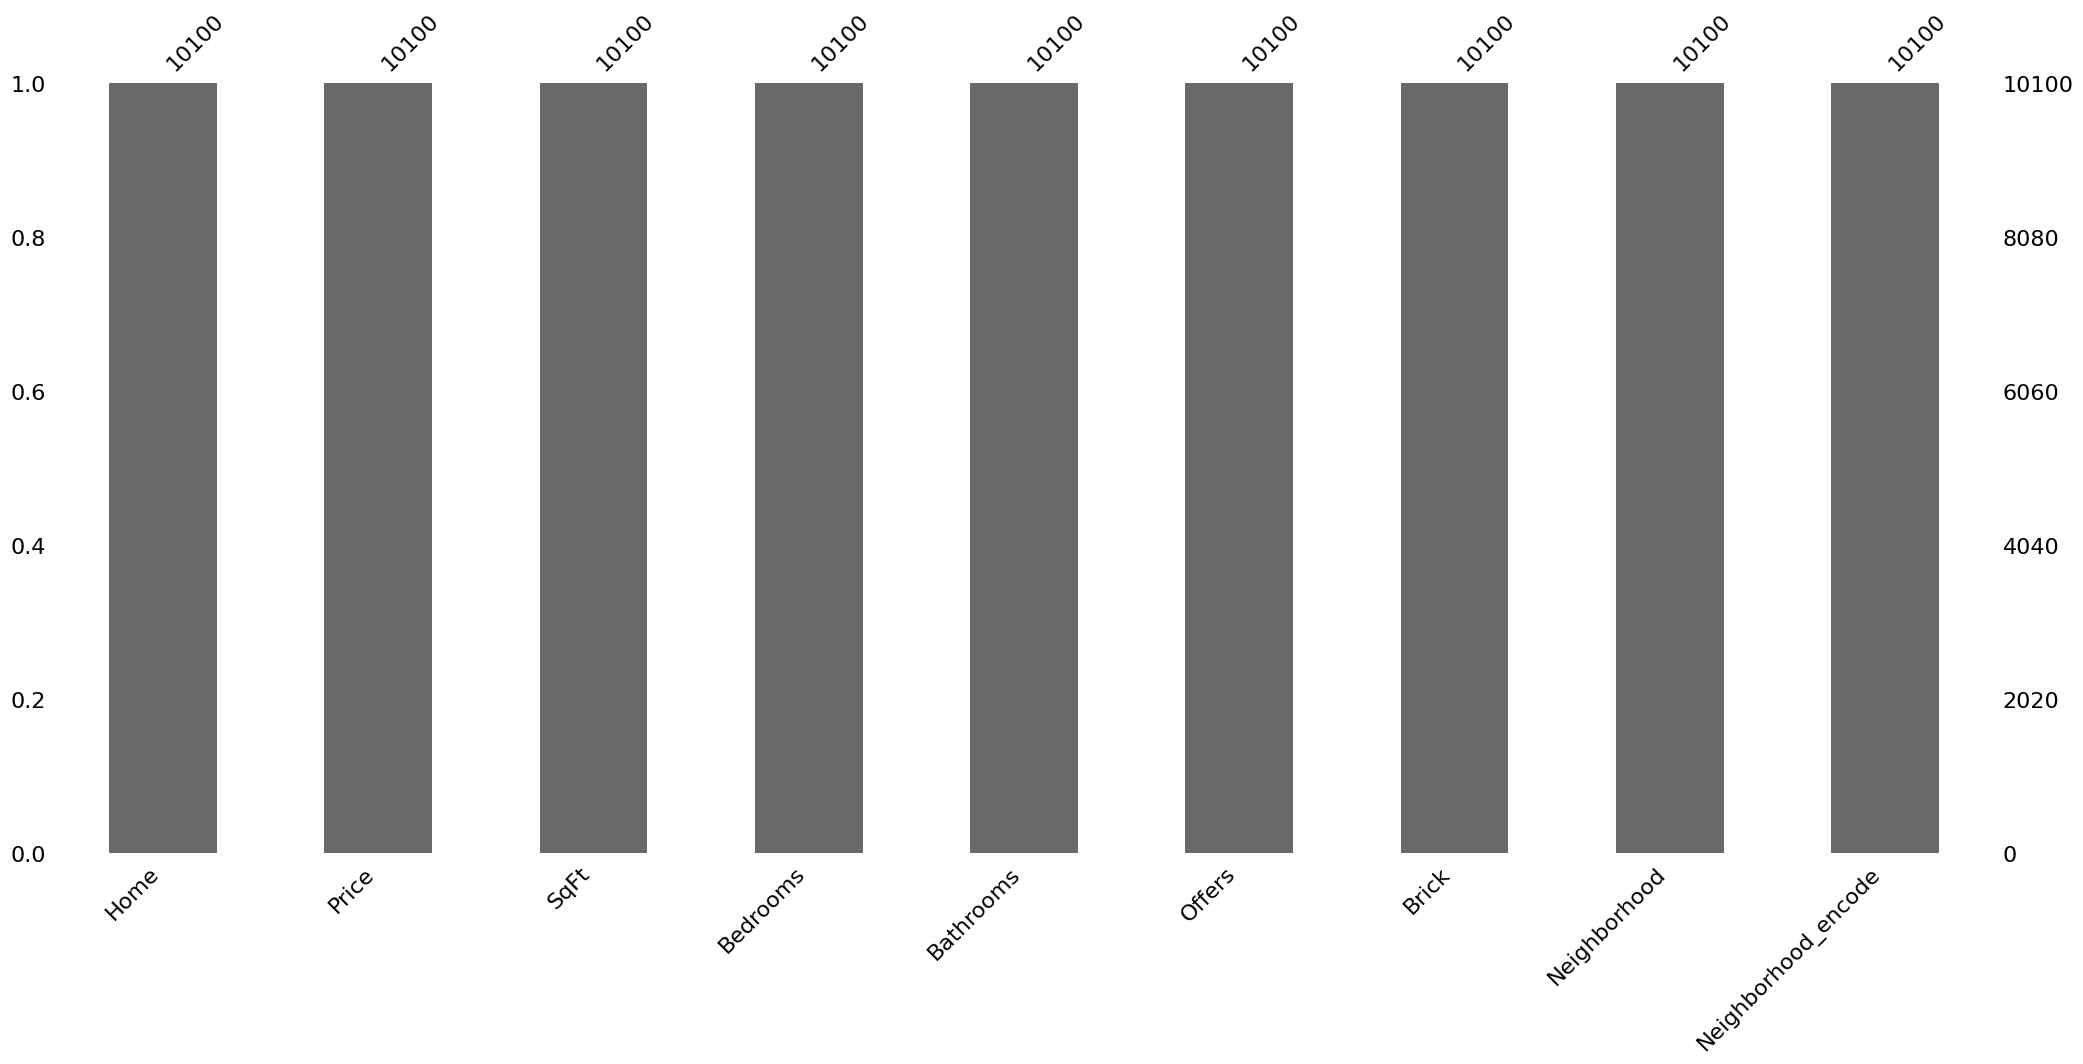

In [247]:
no.bar(df)
##in this chart we can see count of non null values

<AxesSubplot:>

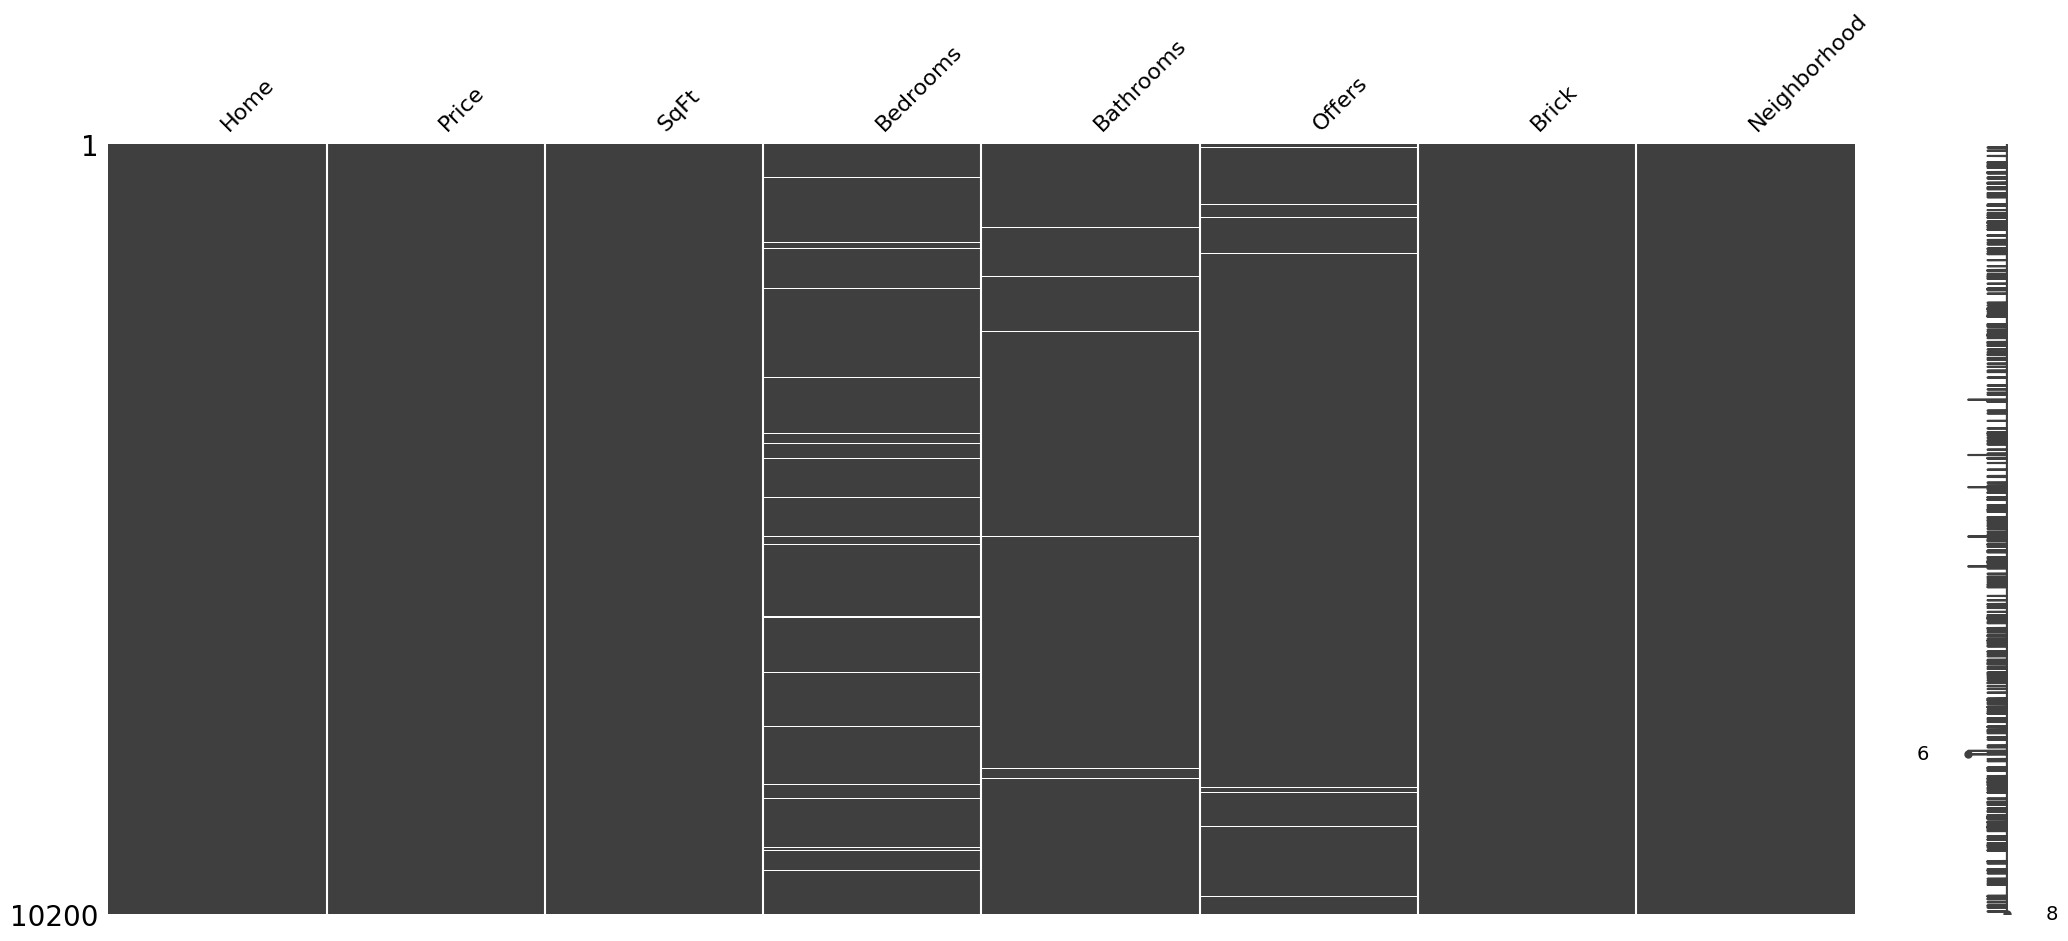

In [198]:
no.matrix(df)
#in this chart we can see null values

<AxesSubplot:>

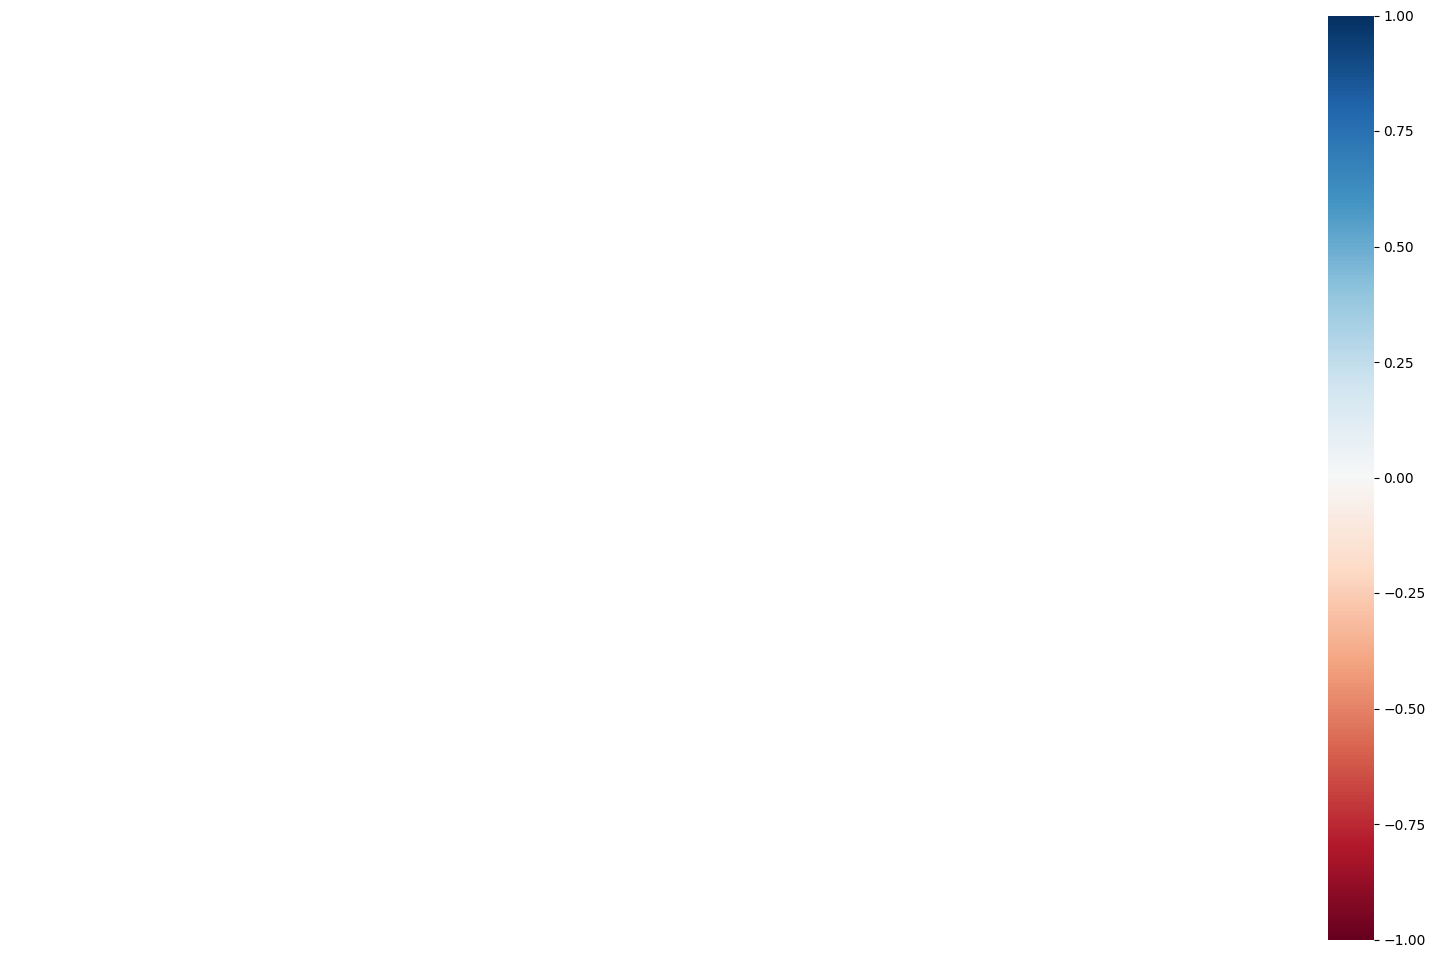

In [249]:
no.heatmap(df)
#realtion of null values with each other, there is no relation between them, if one value in one column
#is null we can not gurantee that in other columns value is null

In [200]:
df.Offers.fillna(0, inplace=True)

In [201]:
df.Bedrooms.fillna(0, inplace=True)

In [250]:
#maybe some houses are studio and they have no bedrooms, so we fill values with zero and we assume that when offer is null
#the house didnt get any offers

In [251]:
#its impossible that a house have no bathrooms so these records arent correct and we will drop them, but we can impute them 
#instead
df.dropna(inplace=True)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10100 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Home          10100 non-null  int32  
 1   Price         10100 non-null  float64
 2   SqFt          10100 non-null  int32  
 3   Bedrooms      10100 non-null  float64
 4   Bathrooms     10100 non-null  float64
 5   Offers        10100 non-null  float64
 6   Brick         10100 non-null  object 
 7   Neighborhood  10100 non-null  object 
dtypes: float64(4), int32(2), object(2)
memory usage: 631.2+ KB


In [204]:
num_cols = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

cols = []

fig = sp.make_subplots(rows=1, cols=len(num_cols), subplot_titles=num_cols)

# Generate boxplots for each numerical column
for i, col in enumerate(num_cols):
    fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i+1)

# Update layout
fig.update_layout(title_text="Boxplots of Numerical Columns",
                  showlegend=False,
                  height=400,
                  width=1200)

# Show the figure
fig.show()


In [205]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000
mean,50.366436,304140.422053,1752.025743,2.930297,2.502673,2.492970
std,28.841239,94259.703005,724.124784,1.449993,1.117200,1.724761
min,1.000000,-16838.535216,500.000000,0.000000,1.000000,0.000000
25%,25.000000,241528.216711,1123.000000,2.000000,2.000000,1.000000
50%,50.000000,300790.458001,1744.000000,3.000000,3.000000,2.000000
75%,75.000000,365390.474885,2383.000000,4.000000,4.000000,4.000000
max,100.000000,681992.623468,3000.000000,5.000000,4.000000,5.000000


In [206]:
# Plot the distribution of the 'Price' column
fig = go.Figure(data=[go.Histogram(x=df['Price'], nbinsx=30)])

# Update layout
fig.update_layout(title_text="Distribution of Price",
                  xaxis_title="Price",
                  yaxis_title="Count")

# Show the figure
fig.show()

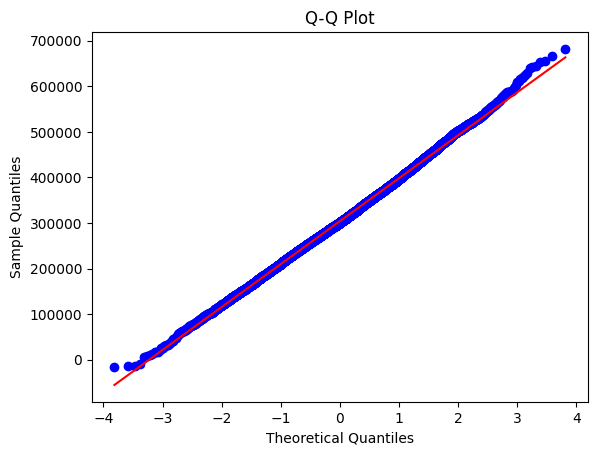

In [207]:
# Create the Q-Q plot
stats.probplot(df.Price, dist="norm", plot=plt)

# Customize the plot
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()

In [208]:
# Plot the distribution of the 'Price' column
fig = go.Figure(data=[go.Histogram(x=df['SqFt'], nbinsx=30)])

# Update layout
fig.update_layout(title_text="Distribution of SqFt",
                  xaxis_title="SqFt",
                  yaxis_title="Count")

# Show the figure
fig.show()

All point of quantiles lie on or close to straight line at an angle of 45 degree from x – axis. It indicates that price is normal.


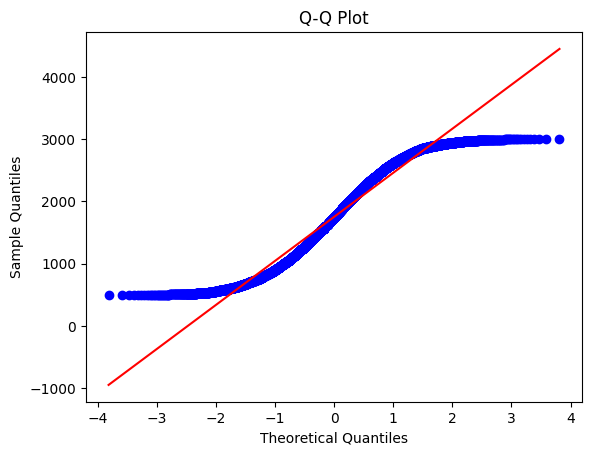

In [209]:
# Create the Q-Q plot
stats.probplot(df.SqFt, dist="norm", plot=plt)

# Customize the plot
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()

If the points in the Q-Q plot deviate from the straight line pattern at any point, it indicates that the dataset does not perfectly follow normal distribution. Specifically, points below the straight line suggest that the data has lower quantiles than expected by the specified distribution, and points above the straight line suggest that the data has higher quantiles than expected. so it does not follows a Normal distribution


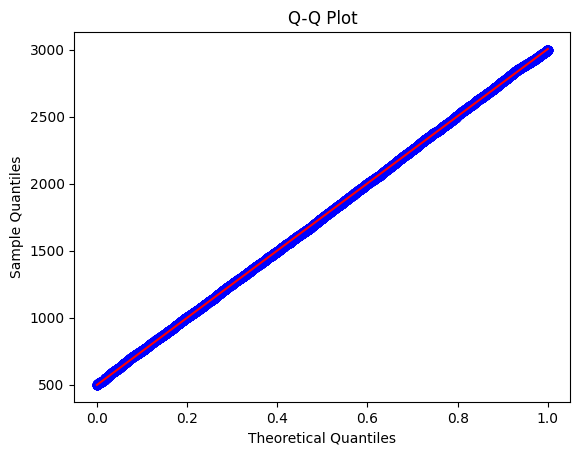

In [210]:
# Create the Q-Q plot
stats.probplot(df.SqFt, dist="uniform", plot=plt)

# Customize the plot
plt.title("Q-Q Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()

but as you can see my data has uniform distribution and it doesnt need transformation either

In [211]:
fig = px.box(df, x=df.Brick, y=df.Price)
fig.show()

In [212]:
fig = px.box(df, x=df.Neighborhood, y=df.Price)
fig.show()

In [213]:
# Measure the impact of Neighborhood on Price using ANOVA
model = ols('Price ~ Neighborhood', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA results for Neighborhood:")
print(anova_table)


# Measure the impact of Brick on Price using ANOVA
model = ols('Price ~ Brick', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA results for Brick:")
print(anova_table)


ANOVA results for Neighborhood:
                    sum_sq       df         F    PR(>F)
Neighborhood  1.432008e+10      3.0  0.537171  0.656793
Residual      8.971420e+13  10096.0       NaN       NaN

ANOVA results for Brick:
                sum_sq       df           F         PR(>F)
Brick     6.338235e+12      1.0  767.517402  6.927316e-163
Residual  8.339029e+13  10098.0         NaN            NaN


ANOVA Results for Neighborhood:

The ANOVA test suggests that the 'Neighborhood' variable does not have a significant impact on the 'Price'. The calculated F-statistic and p-value indicate that differences in 'Price' across different neighborhoods are likely due to random variation rather than a systematic effect of the neighborhood.
ANOVA Results for Brick:

In contrast, the ANOVA test reveals that the 'Brick' variable has a significant impact on the 'Price'. The low p-value and high F-statistic indicate strong evidence that the type of brick construction (Yes or No) has a noticeable effect on the 'Price' of homes.
In simpler terms, the results suggest that the type of brick used in construction (Brick) has a meaningful influence on home prices, while the specific neighborhood (Neighborhood) may not have a significant impact on home prices according to the analyzed data.

In [214]:
df['Brick'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [234]:
mean_values = pd.DataFrame(df.groupby('Neighborhood')['Price'].mean()).sort_values(by='Price', ascending=True)

# # Create a mapping based on the mean values
mapping = {category: idx for idx, category in enumerate(mean_values.index)}

# # Apply the mapping to create a new encoded column
df['Neighborhood_encode'] = df['Neighborhood'].map(mapping)

<AxesSubplot:>

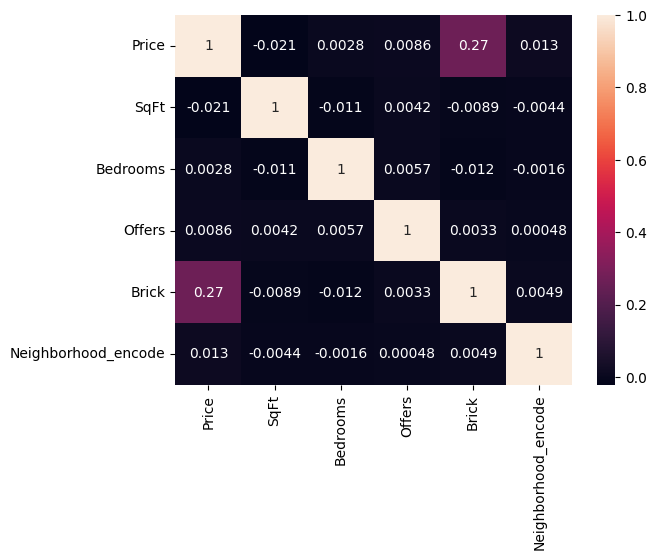

In [237]:
cor = df[['Price', 'SqFt', 'Bedrooms', 'Offers', 'Brick', 'Neighborhood_encode']].corr()
sn.heatmap(cor, annot=True)